In [6]:
%pylab inline
import yt
from yt.mods import *
yt.funcs.mylog.setLevel(50) #coerce output null

Populating the interactive namespace from numpy and matplotlib


In [7]:
# cd ~/project/FLASH4.3_2/object/

In [8]:
cd ~/Desktop/projects/FLASH4.3_2/object/Ricker_et_al/

/Users/dorislee/Desktop/projects/FLASH4.3_2/object/Ricker_et_al


In [33]:
def plot_dens(i):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
#     slc.annotate_grids()
    slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
    slc.set_zlim(physical_quantity, 5.5e-22,1.1e-19)
    slc.show()
def plot_all(i):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    slc.annotate_grids()
#     slc.set_log("all", False)
    slc.set_zlim(physical_quantity, 5.5e-22,1.1e-19)
    slc.set_cmap("all","rainbow")
    slc.show()

    physical_quantity="pressure"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_cmap("all","rainbow")
    slc.set_figure_size(5)
#     slc.set_log("all", False)
    # slc.set_zlim(physical_quantity,58,60)
    slc.show()

    physical_quantity="temperature"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_cmap("all","rainbow")
    slc.set_figure_size(5)
#     slc.set_zlim(physical_quantity,58,60)
#     slc.set_log("all", False)
    slc.show()


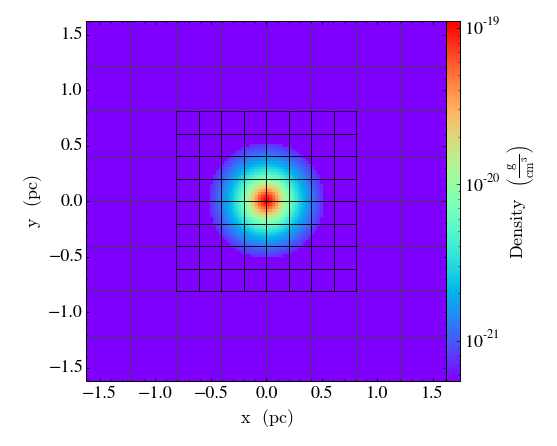


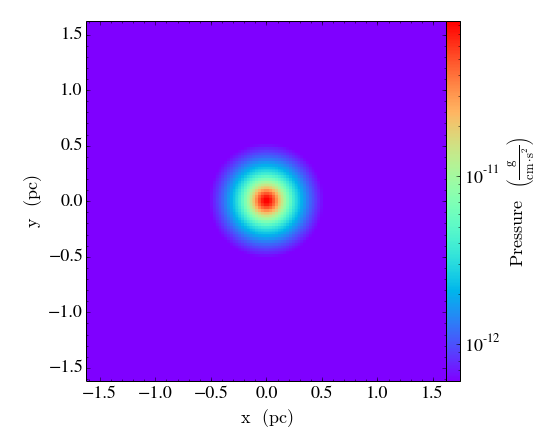


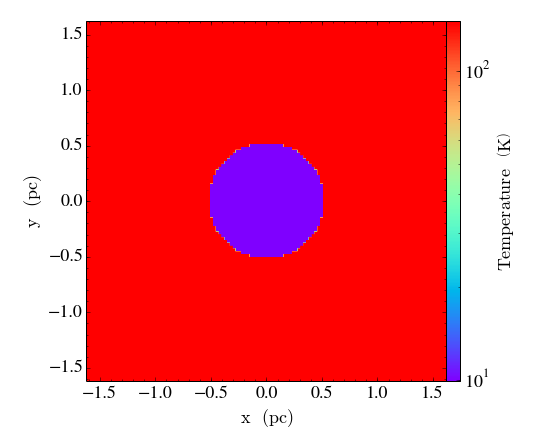

In [34]:
plot_all(0)

(1000000000000000.0, 5e+18)

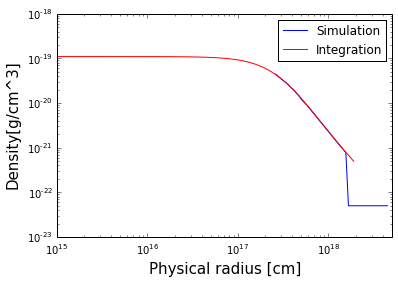

In [12]:
from scipy import integrate
from matplotlib.legend_handler import HandlerLine2D
from mpl_toolkits.axes_grid1 import AxesGrid
i =0
rho_c = 1.1E-19
# pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
pf = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
plt.figure()
sp = pf.sphere(pf.domain_center, (1.5,"pc"))
rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
plt.loglog(rp.x.value,rp["density"].in_units("g/cm**3").value,label="Simulation")
xi_max = 20.0
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
#1cm = 3.24077929e-19 Parsecs
plt.loglog(r,rho*rho_c,label ='Integration',color="red")#$\rho$')
plt.xlabel("Physical radius [cm]",fontsize=15)
plt.ylabel("Density[g/cm^3]",fontsize=15)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)
plt.xlim(1e15,5e18)

(2e+17, 4e+18)

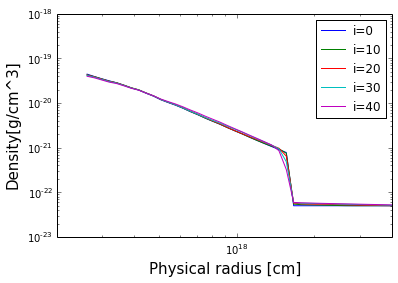

In [18]:
plt.figure()
for i in np.arange(50):
    if i %10 ==0 or i ==0 : 
        pf = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
        sp = pf.sphere(pf.domain_center, (1.5,"pc"))
        rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
        plt.loglog(rp.x.value,rp["density"].in_units("g/cm**3").value,label="i={}".format(i))
plt.xlabel("Physical radius [cm]",fontsize=15)
plt.ylabel("Density[g/cm^3]",fontsize=15)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)
plt.xlim(2e17,4e18)

In [30]:
c

YTArray([  5.03906250e+18,   5.03906250e+18,   4.96093750e+18]) code_length

In [31]:
ds.ortho_ray?

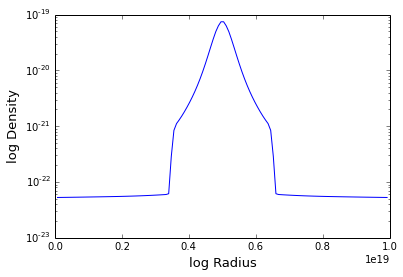

In [29]:
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
c = ds.find_max("density")[1]
ax = 0 # Cut through x axis
# cutting through the y0,z0 such that we hit the max density
ray = ds.ortho_ray(ax, (c[1], c[2]))
srt = np.argsort(ray['x'])
plt.semilogy(np.array(ray['x'][srt]), np.array(ray['density'][srt]),label="i={}".format(i))
#     plt.title("Timestep {}".format(timestep),fontsize=13)
plt.xlabel("log Radius",fontsize=13)
plt.ylabel('log Density',fontsize=13)

In [27]:
# plt.subplot(211)
def density_radial_profile(timestep):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    c = ds.find_max("density")[1]
    ax = 0 # Cut through x axis
    # cutting through the y0,z0 such that we hit the max density
    ray = ds.ortho_ray(ax, (c[1], c[2]))
    srt = np.argsort(ray['x'])
    plt.semilogy(np.array(ray['x'][srt]), np.array(ray['density'][srt]),label="i={}".format(i))
#     plt.title("Timestep {}".format(timestep),fontsize=13)
    plt.xlabel("log Radius",fontsize=13)
    plt.ylabel('log Density',fontsize=13)

/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


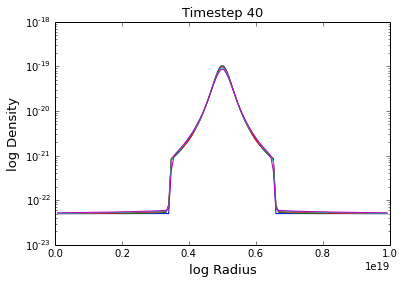

In [28]:
plt.figure()
for i in np.arange(50):
    if i %10 ==0 or i ==0 : 
        density_radial_profile(i)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)


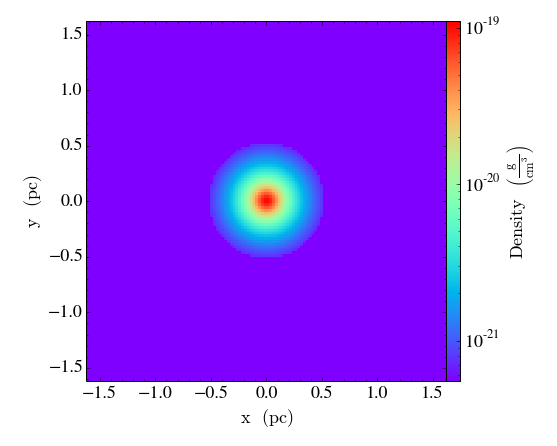


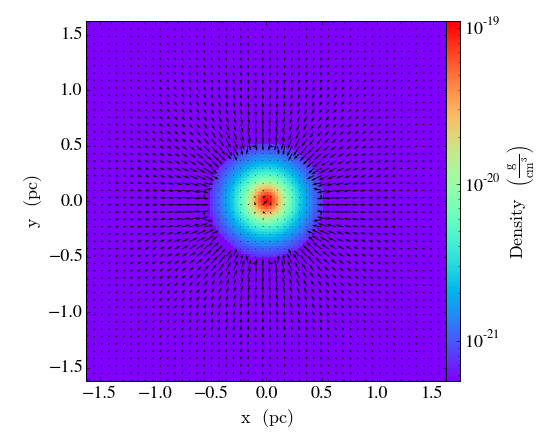


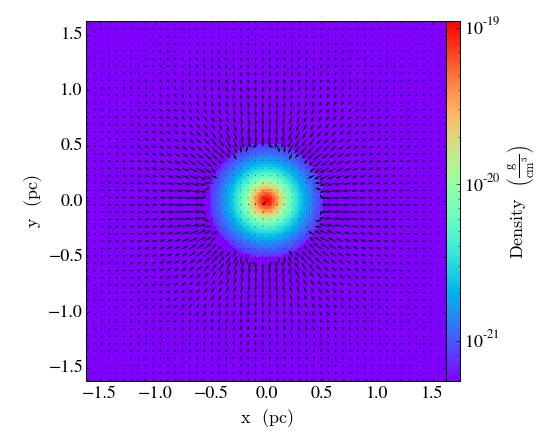


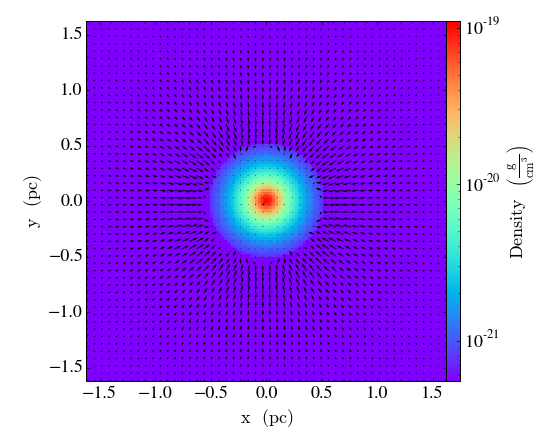


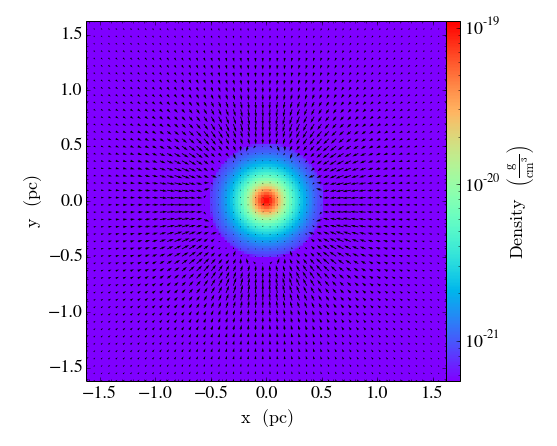


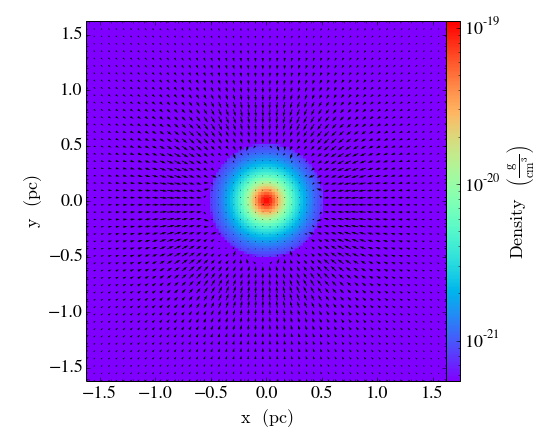


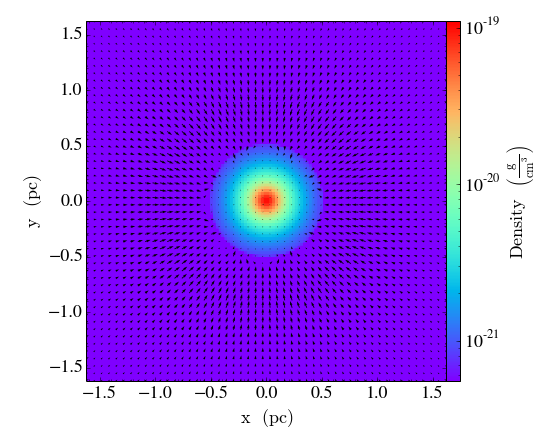


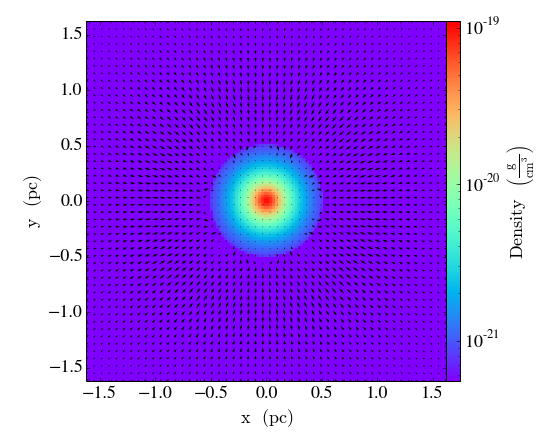


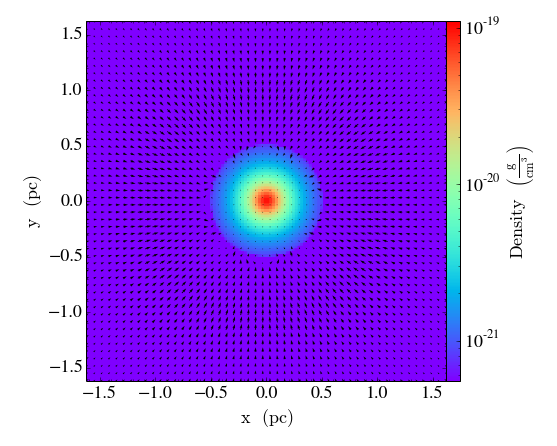


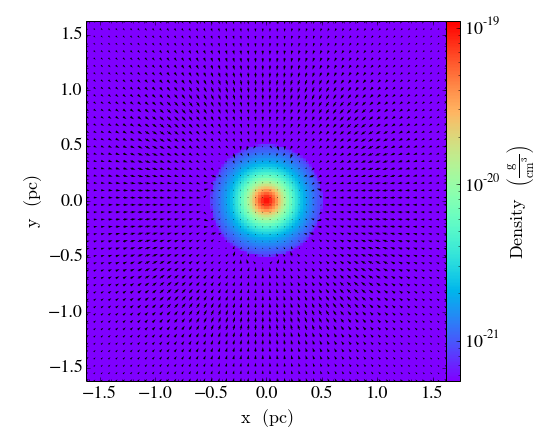


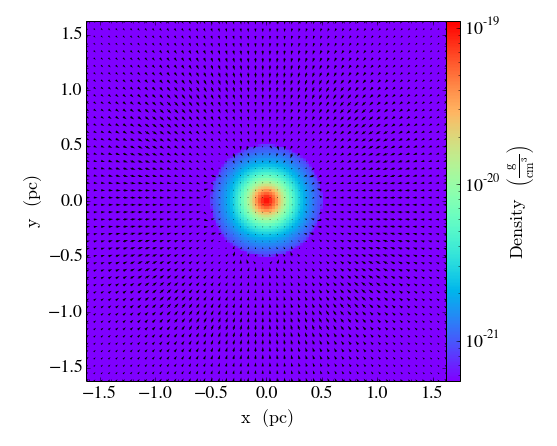


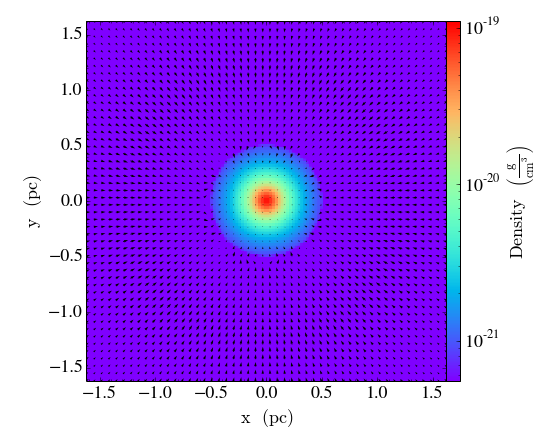


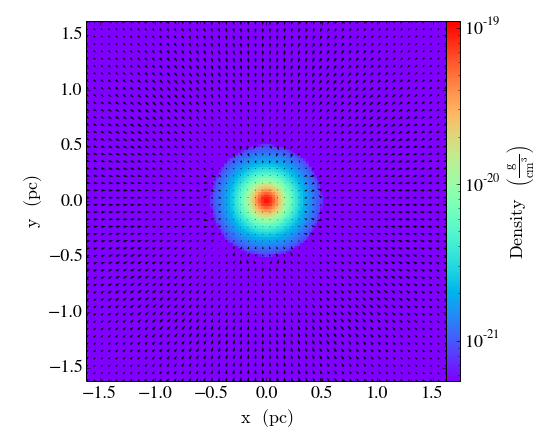


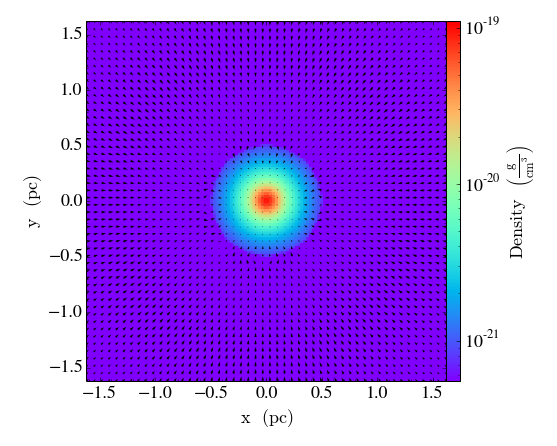


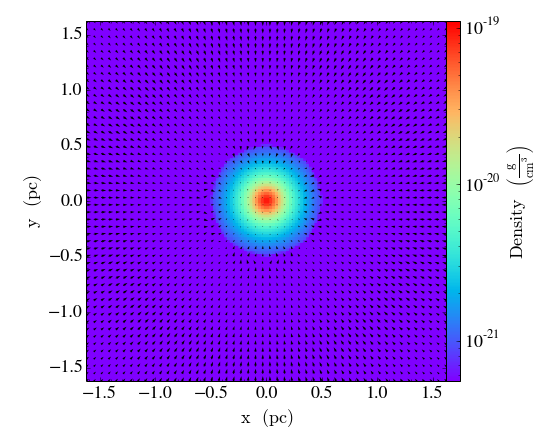


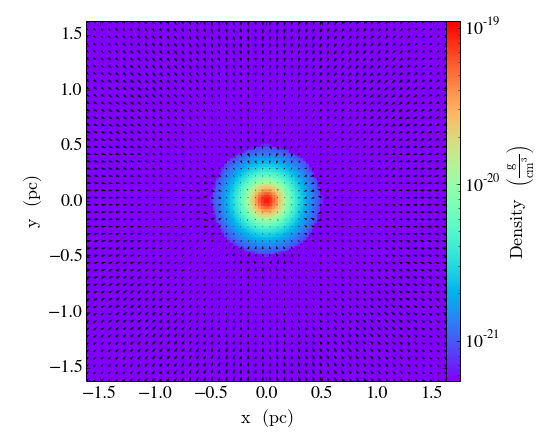


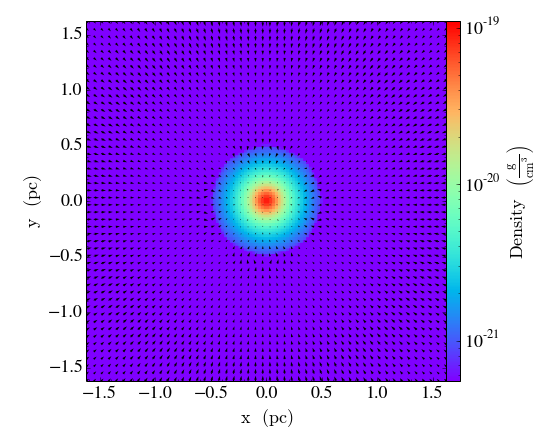


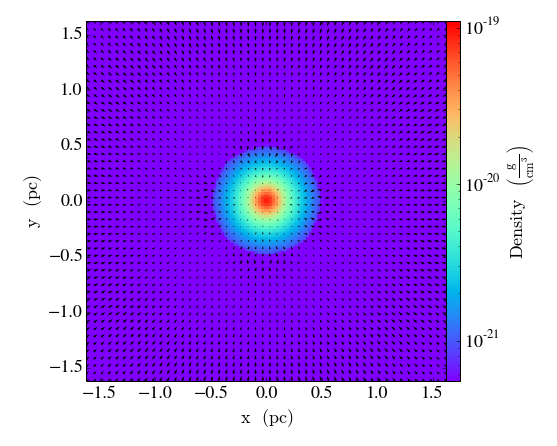


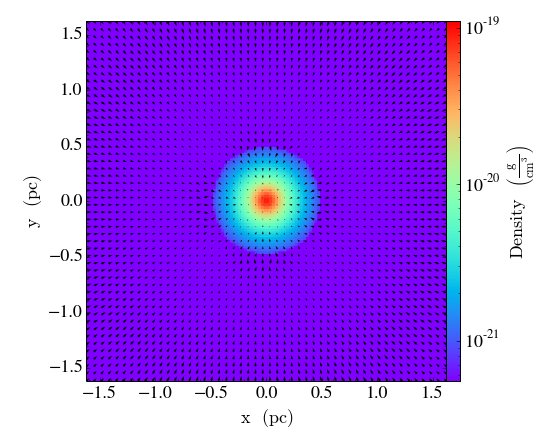


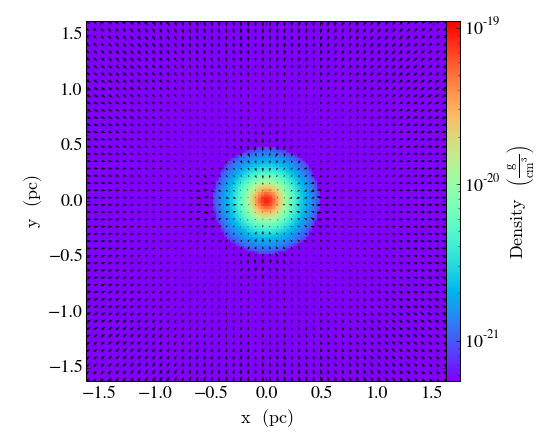


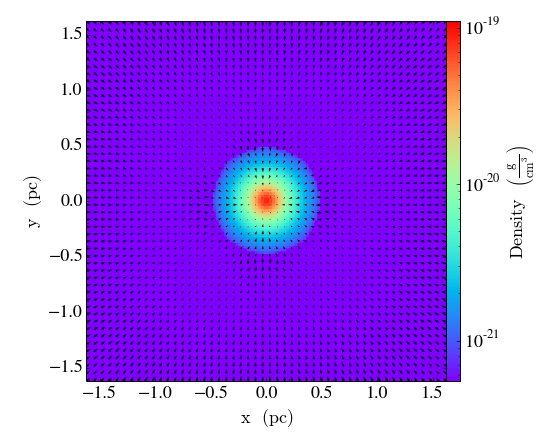


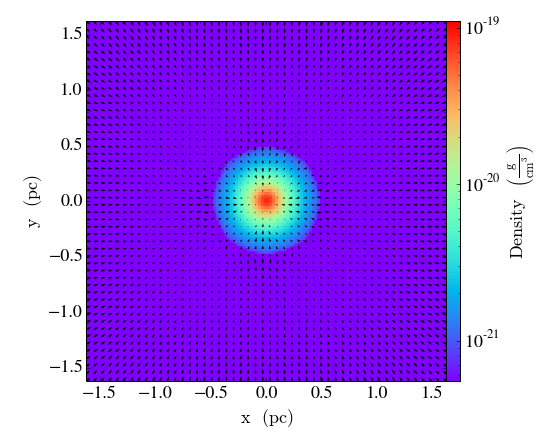


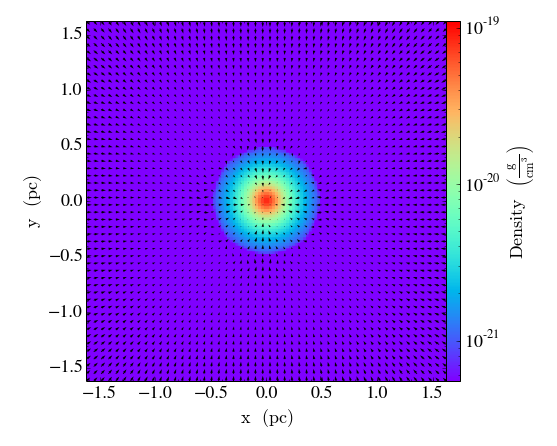


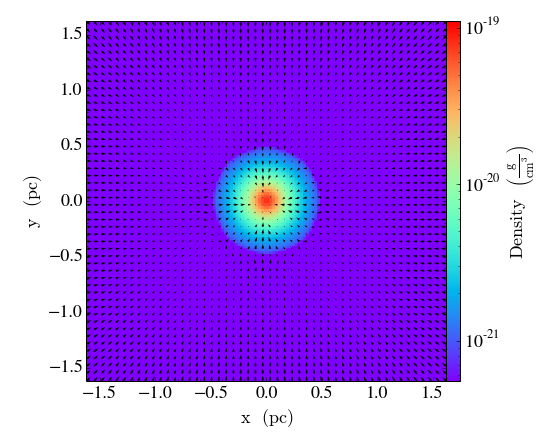


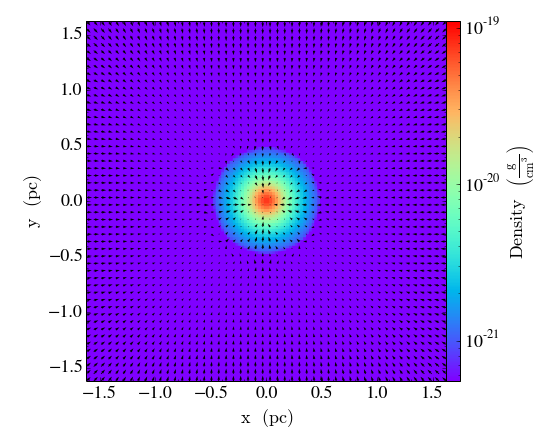

In [17]:
for i in np.arange(50):
    if i%2 ==0:
        plot_dens(i)

In [12]:
def plot_rv(i):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="radial_velocity"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
#     slc.annotate_grids()
    slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
#     slc.set_zlim(physical_quantity, 5.5e-26,1.1e-19)
    slc.set_log("all", False)
    slc.show()


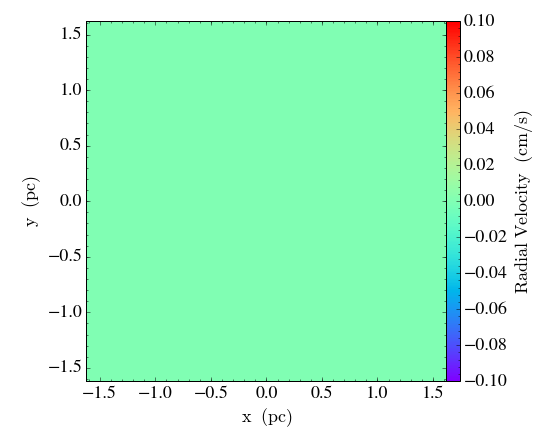


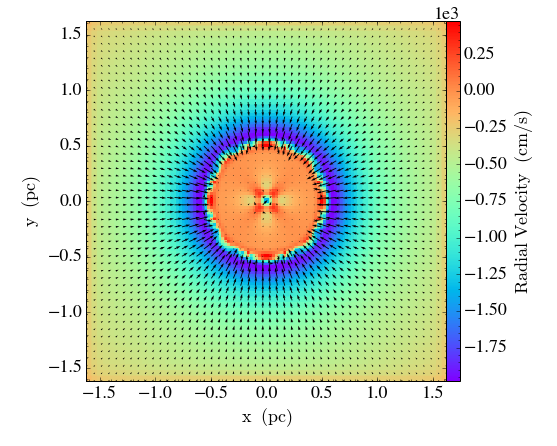


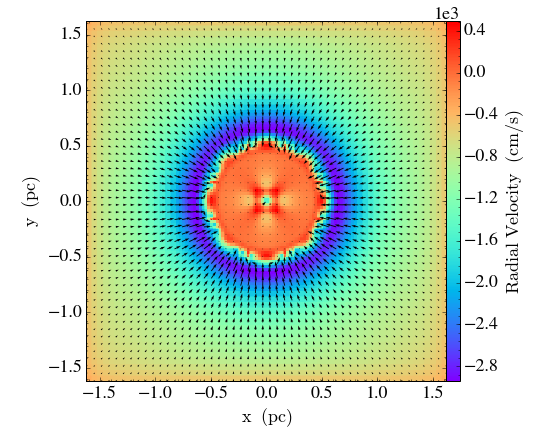


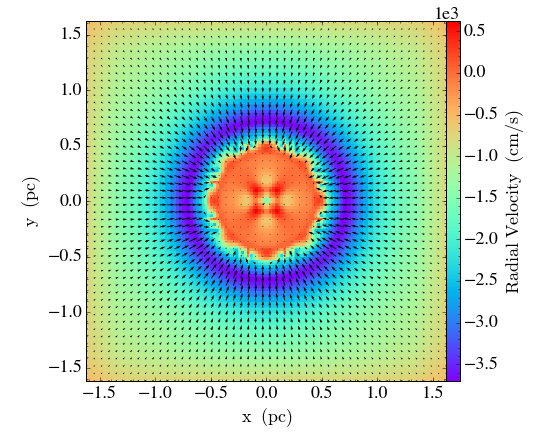


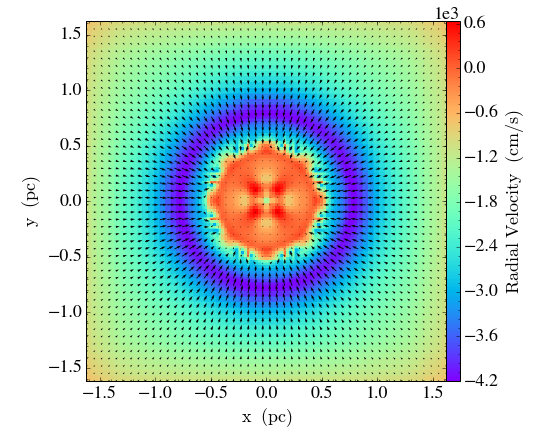


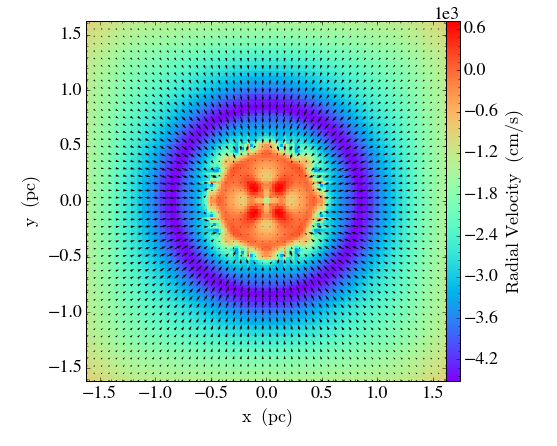


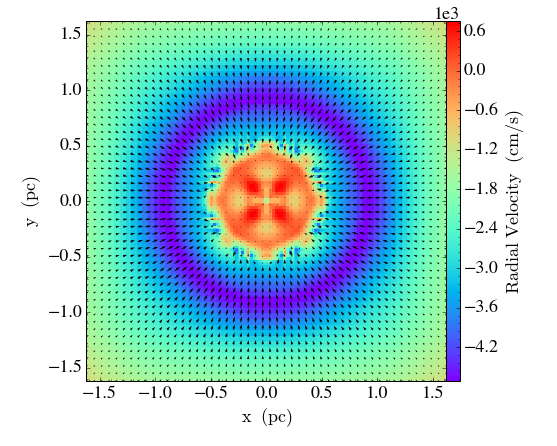


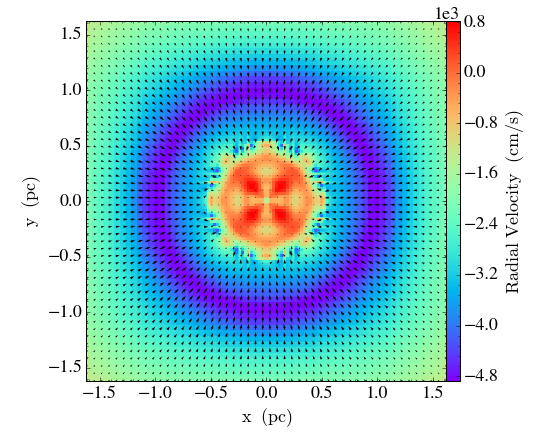


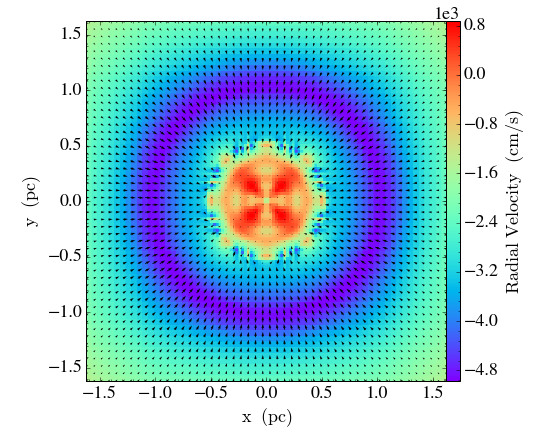


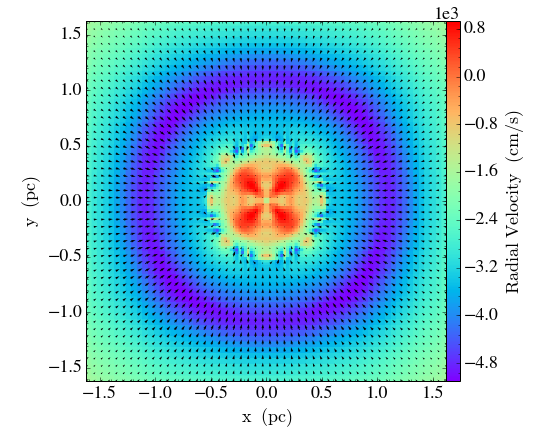


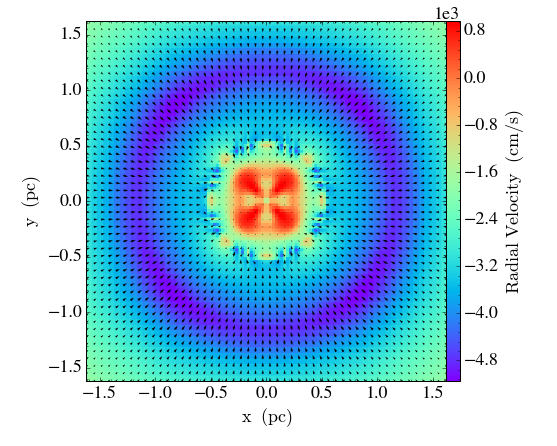


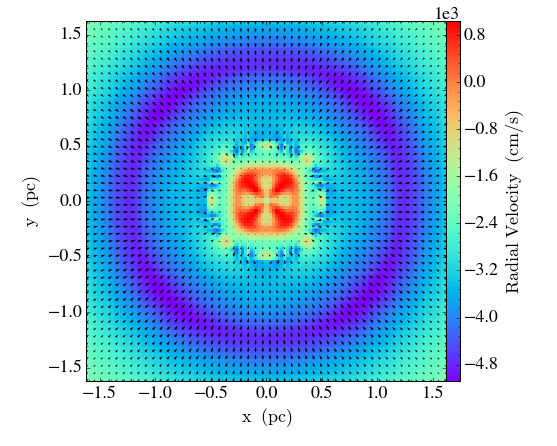


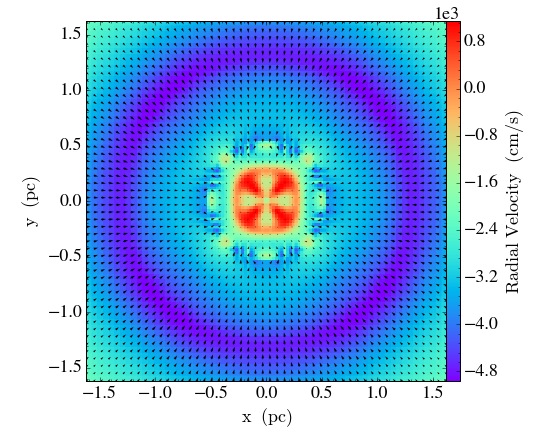


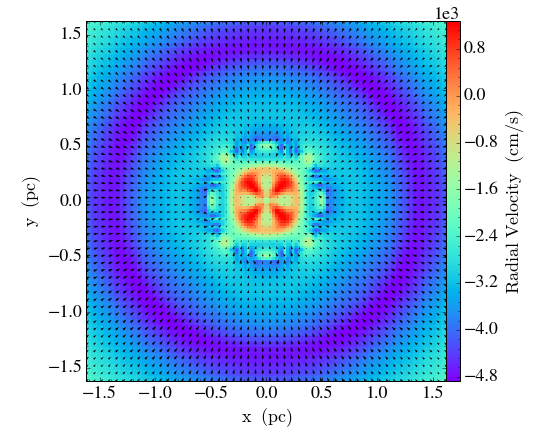


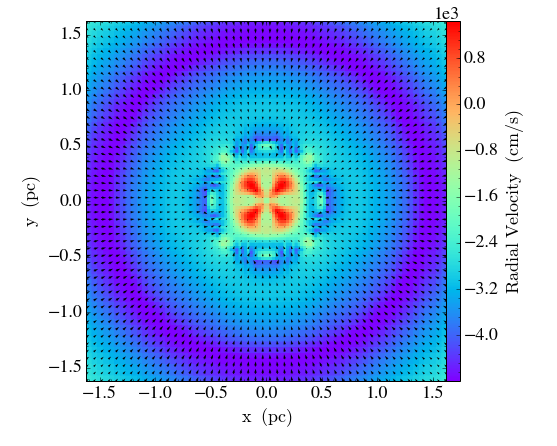


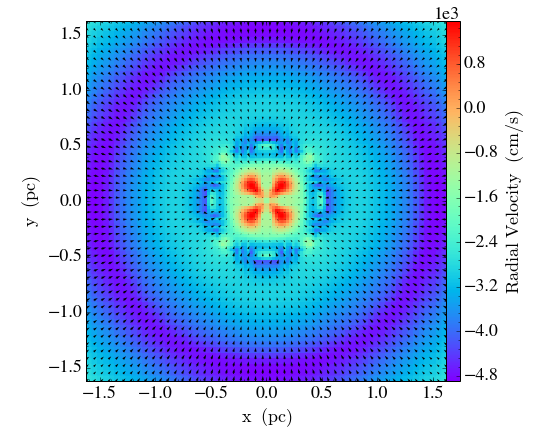


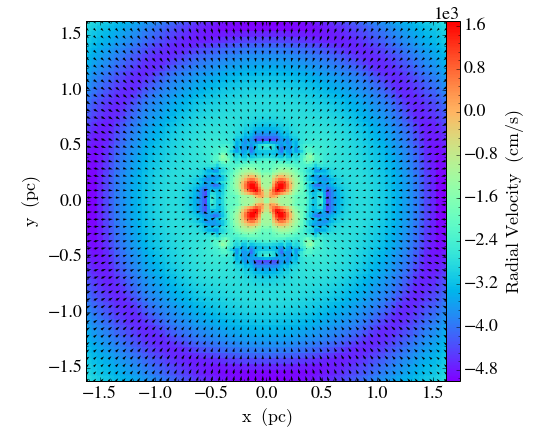


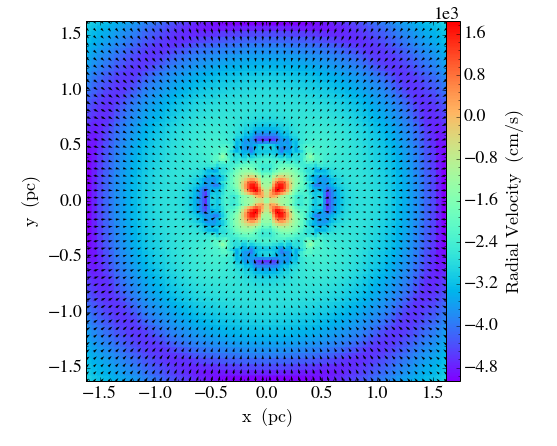


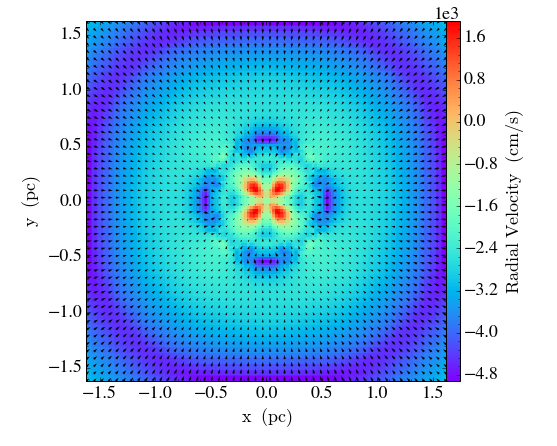


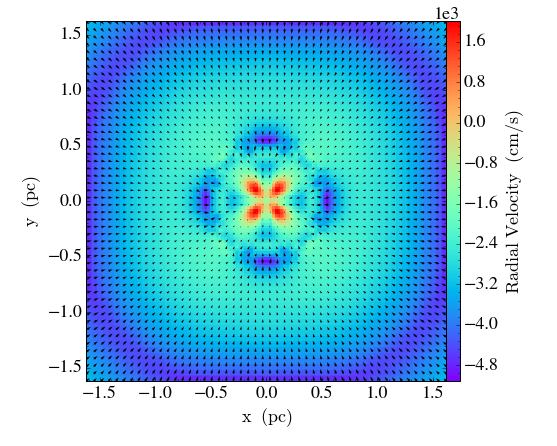


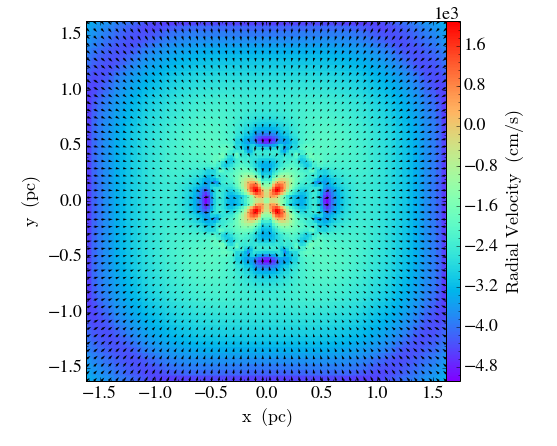


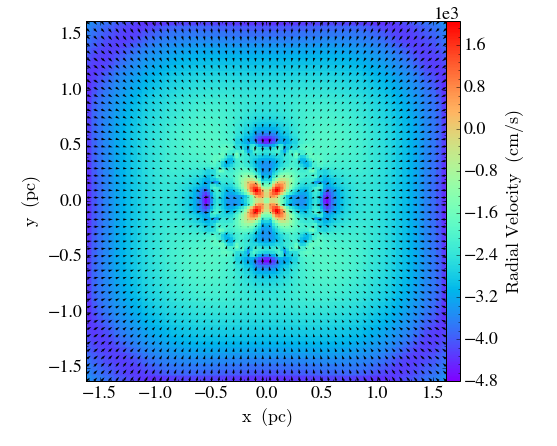


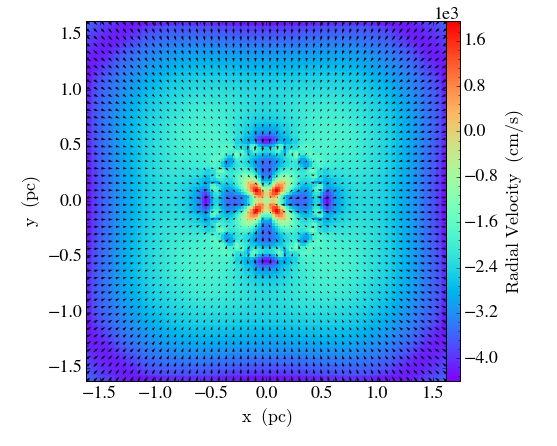


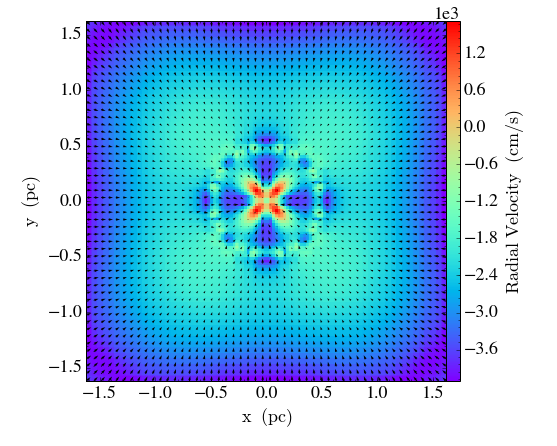


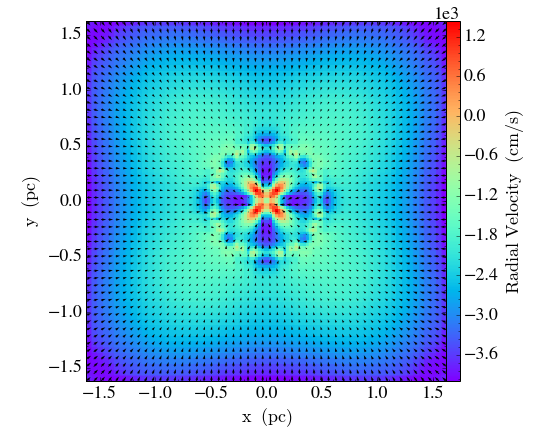

In [13]:
for i in np.arange(0,50):
    if i%2==0:
        plot_rv(i)

In [14]:
5.0192E+13/6.33e12

7.929225908372827

This is almost 8tff